In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
#from importlib import reload
#from mppi import InputFiles as I, Calculators as C, Datasets as D

In [2]:
data_dir = 'rt_k100random_width100_no-com/FixSymm/ypp_NETime_1000-freq_1.55-pol_circular'

In [3]:
file1 = os.path.join(data_dir,'o-NETime_1000-freq_1.55-pol_circular.YPP-RT_occ_bands_iT5') # at t=400 fs
file2 = os.path.join(data_dir,'o-NETime_1000-freq_1.55-pol_circular.YPP-RT_occ_bands_iT11') # at t=1000 fs
files = {'t400' : file1,'t1000' : file2}

In [4]:
def parserArrayFromFile(fname):
    """"
    Build a list that contains the lines of fname avoiding the ones that start
    with #
    """
    lines = []
    with open(fname) as f:
        for l in f:
            if not l.startswith('#'):
                lines.append(l)
    #split each line in a list (of strings)
    larray = [[] for i in range(len(lines))]
    for ind,l in enumerate(lines):
        larray[ind] = l.split()
    #convert the string to double. If some elements is a string (it can happen in
    #the 4.4 Yambo version in the output file of a bands calculation) remove it
    for row in range(len(larray)):
        for col in range(len(larray[row])):
            try:
                larray[row][col] = float(larray[row][col])
            except ValueError:
                del larray[row][col]
    return larray

In [5]:
results = {}
for f in files:
    results[f] = {}
    data = parserArrayFromFile(files[f])
    split_points = []
    for ind,d in enumerate(data):
        if d[0] == 0.:
            split_points.append(ind)
    data_split = []
    for ind in range(len(split_points)-1):
        data_split.append(data[split_points[ind]:split_points[ind+1]])
    data_split.append(data[split_points[-1]:])
    results[f]['k'] = [d[0] for d in data_split[0]]
    
    bnd_rad = 'bnd'
    occ_rad = 'occ'
    occ_up_rad = 'occ_up'
    occ_dn_rad = 'occ_dn'
    
    ind0 = 5
    for band,dd in enumerate(data_split): 
        key = bnd_rad+str(ind0+band)
        results[f][key] = [val[1] for val in dd]
        key = occ_rad+str(ind0+band)
        results[f][key] = [val[2] for val in dd]
        key = occ_up_rad+str(ind0+band)
        results[f][key] = [val[3] for val in dd]
        key = occ_dn_rad+str(ind0+band)
        results[f][key] = [val[4] for val in dd]

In [6]:
results['t400'].keys()

dict_keys(['occ7', 'occ_dn9', 'occ_dn5', 'k', 'occ_dn6', 'occ_up10', 'bnd8', 'occ_dn8', 'occ6', 'occ_dn10', 'bnd7', 'occ_dn7', 'occ_up9', 'occ5', 'occ8', 'occ_up5', 'bnd6', 'occ10', 'occ_up6', 'bnd5', 'occ9', 'occ_up7', 'occ_up8', 'bnd9', 'bnd10'])

Plot the bands close to gamma

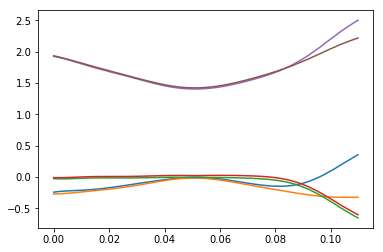

In [7]:
for ind in range(5,11):
    plt.plot(results['t400']['k'],results['t400']['bnd'+str(ind)])

Plot the real-time occupations

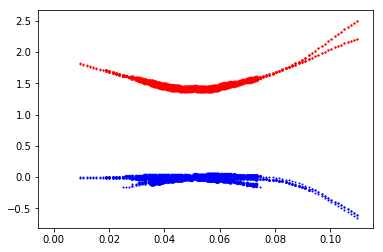

In [11]:
t = 't400'
for ind in range(5,11):
    bnd_str = 'bnd'+str(ind)
    occ_str = 'occ'+str(ind)
    for k,e,occ in zip(results[t]['k'],results[t][bnd_str],results[t][occ_str]):
        xx = abs(int(occ*60))
        color = 'blue' if occ < 0 else 'red'
        plt.scatter(k,e,s=xx,c=color)
plt.show()

Plot the spin-resolved real-time occupations. Sum the spin up and spin down components of the conduction bands (9 and 10) and plot in function of k

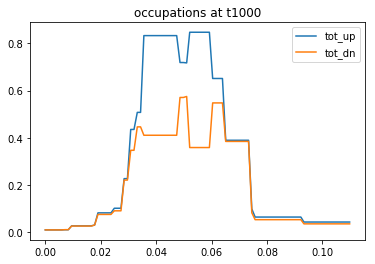

In [40]:
t = 't1000'
tot_up = np.array(results[t]['occ_up9'])+np.array(results[t]['occ_up10'])
tot_dn = np.array(results[t]['occ_dn9'])+np.array(results[t]['occ_dn10'])
plt.plot(results[t]['k'],tot_up,label='tot_up')
plt.plot(results[t]['k'],tot_dn,label='tot_dn')
plt.title('occupations at '+t)
plt.legend()
plt.show()

In [37]:
(sum(tot_up)-sum(tot_dn))/(sum(tot_up)+sum(tot_dn))*100

20.794302509227528